In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('sales data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
categorical_features = ['Channel','Region']
continuous_features = ['Fresh','Milk','Grocery' ,'Detergents_Paper' ,'Delicassen']

for col in categorical_features:
    dummies = pd.get_dummies(data[col],prefix=col)
    data = pd.concat([data,dummies], axis=1)
    data.drop(col, axis=1,inplace=True) #기존에 channel , Region 컬럼을 삭제하기 위함

data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,12669,9656,7561,214,2674,1338,False,True,False,False,True
1,7057,9810,9568,1762,3293,1776,False,True,False,False,True
2,6353,8808,7684,2405,3516,7844,False,True,False,False,True
3,13265,1196,4221,6404,507,1788,True,False,False,False,True
4,22615,5410,7198,3915,1777,5185,False,True,False,False,True


In [4]:
mms = MinMaxScaler()
mms.fit(data)
data_transformed = mms.transform(data)

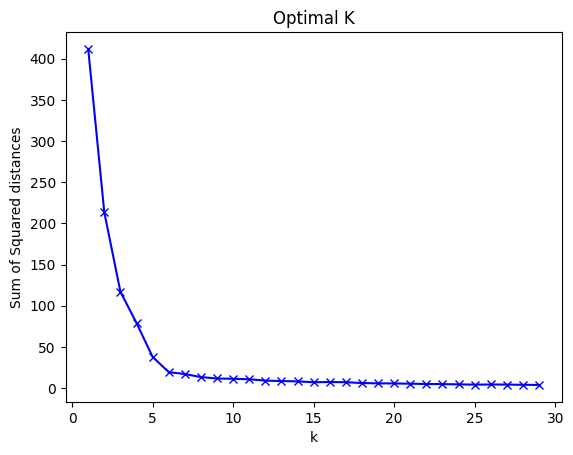

In [9]:
Sum_of_squared_distances = []
K = range(1,30)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K,Sum_of_squared_distances , 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of Squared distances')
plt.title('Optimal K')
plt.show()